In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
path = '/Users/anthonygarcia/Desktop/hawaii.sqlite'
engine = create_engine(f"sqlite:///{path}")

In [5]:
#delcare a base
Base = automap_base()

In [6]:
#reflect the database tables
Base.prepare(engine, reflect=True)

In [7]:
#print all the classes connected to the base
Base.classes.keys()

['measurement', 'station']

In [8]:
#assign measurement to variable
measure = Base.classes.measurement

In [9]:
#assign station class to variable
station = Base.classes.station

In [10]:
#create a session
session = Session(engine)

In [11]:
#print measurement table in a DF
conn = engine.connect()
df = pd.read_sql("SELECT * FROM measurement",conn)
df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [12]:
# the most recent date in dataset
date = session.query(measure.date).order_by(measure.date.desc()).first()
date

('2017-08-23',)

In [ ]:
# retrieve the previous 12 months of precipitation data, use only data and prcp
qry = session.query(measure.date,measure.prcp).filter(measure.date >= '2016-09-01').group_by(measure.date).all()
qry

In [14]:
#load data into a pandas dataframe
data = pd.DataFrame(qry)


In [15]:
#rename columns
rename = data.rename(columns = {0:'Date',1:'Prcp'})

In [16]:
#sort DF values by date
sort = rename.sort_values('Date',ascending=True)


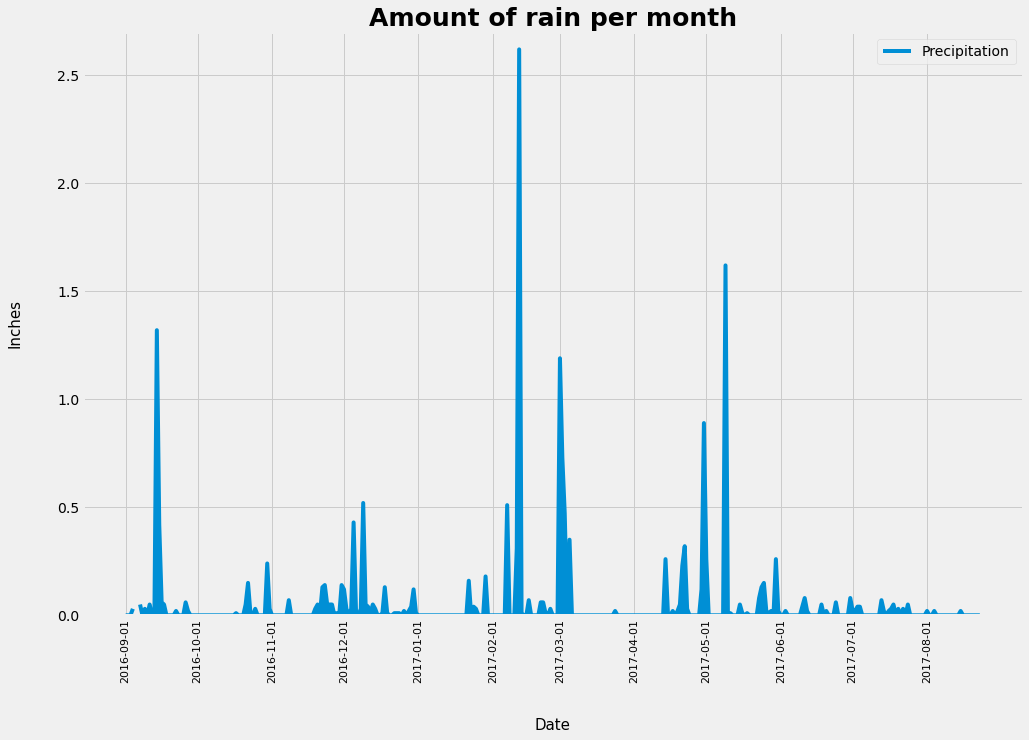

In [17]:
#plot the results using the plot method
months = sort['Date']
rain = sort['Prcp']

plt.plot(months,rain,label='Precipitation')

plt.fill_between(months,rain)
plt.xticks(['2016-09-01','2016-10-01','2016-11-01','2016-12-01','2017-01-01','2017-02-01','2017-03-01','2017-04-01','2017-05-01','2017-06-01','2017-07-01','2017-08-01'])
plt.xticks(fontsize=11,rotation=90)
plt.legend()
plt.xlabel('Date', fontsize=15, labelpad=35)
plt.ylabel('Inches', fontsize=15, labelpad=35)
plt.title('Amount of rain per month', fontsize=25, loc='center', fontweight='bold')
plt.ylim(0.0,2.70)
fig = plt.gcf()
fig.set_size_inches(15,10)

plt.show() 

In [18]:
#get the summary statistics for precipitation
summary = sort['Prcp'].describe()

#create DataFrame for summary statistics
summary_df=pd.DataFrame(summary)
summary_df

,Prcp
count,355.000000
mean,0.049099
std,0.207369
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [20]:
#total number of stations within the dataset
count = session.query(station.station).count()
count

9

In [21]:
#find the most active stations and list stations and observation counts in descending order
total_count = session.query(measure.station,func.count(measure.station)).group_by(measure.station).order_by(func.count(measure.station).desc()).all()
total_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
#find the lowest temperature for the most active station
low = session.query(measure.station,func.min(measure.tobs)).filter(measure.station == 'USC00519281').all()
low


[('USC00519281', 54.0)]

In [23]:
#find the highest temperature for the most active station
high = session.query(measure.station,func.max(measure.tobs)).filter(measure.station == 'USC00519281').all()
high

[('USC00519281', 85.0)]

In [24]:
#find the average temperature for the most active station
average = session.query(measure.station,func.avg(measure.tobs)).filter(measure.station == 'USC00519281').all()
average

[('USC00519281', 71.66378066378067)]

In [ ]:
#filter by the station with the highest observation & query the previous 12 months of temperature observation data (TOBS)
filter_ = session.query(measure.station,measure.date,measure.tobs).\
          filter(measure.station == 'USC00519281').\
          filter(measure.date >= '2016-09-01').\
          order_by(measure.date.desc()).all()
filter_

In [26]:
#create a dataframe for the query
tobs_df = pd.DataFrame(filter_)


In [27]:
#rename columns for the dataframe 
columns = tobs_df.rename(columns = {0:'Station',1:'Date',2:'Tobs'})


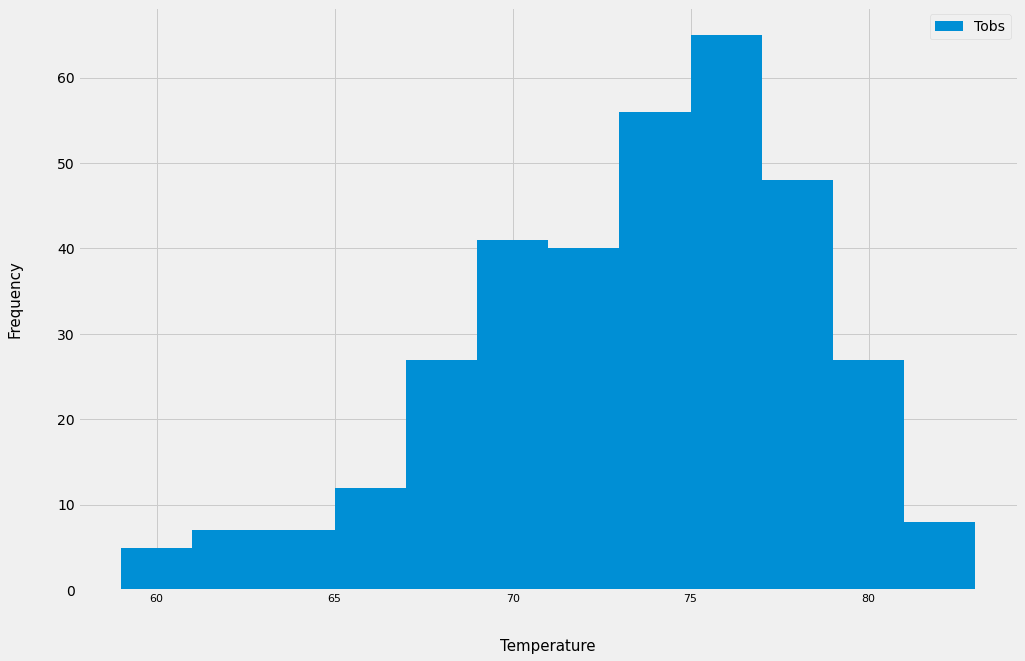

In [28]:
#Plot the results as a histogram with bins=12
plot = columns['Tobs']

plt.hist(plot,bins=12,label='Tobs')
plt.legend()

plt.xticks(fontsize=11)
plt.legend()
plt.xlabel('Temperature', fontsize=15, labelpad=35)
plt.ylabel('Frequency', fontsize=15, labelpad=35)

fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

In [29]:
session.close()